In [2]:
import torch
from torch import nn
import torchmetrics
import torchvision
from torchvision import transforms
from torchvision.transforms import ToTensor

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [4]:
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor, Compose

class ImageDataset(Dataset):
    def __init__(self, image_dir, image_dir_2, transform=None):
        self.image_dir = image_dir
        self.image_dir_2 = image_dir_2
        self.image_files = [i for i in os.listdir(image_dir) if i.endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
        self.images_files_2 = [i for i in os.listdir(image_dir_2) if i.endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
        self.transform = transform
 
    def len(self):
        return len(self.image_files)

    def getItem(self, dirc, files, idx):
        img_path = os.path.join(dirc, files[idx])
        image = Image.open(img_path).convert("L")
        if self.transform:
            image = self.transform(image)
        return image  
    
    def getDataset(self, limit):
        total_dataset = []
        for i in range(1, limit):
            if i % 1000 == 0:
                print(f"Have reached {i}/{len(self.image_files)}")
            total_dataset.append([self.getItem(dirc =self.image_dir, files=self.image_files, idx=i), self.getItem(dirc =self.image_dir_2, files=self.images_files_2, idx=i)])
        return total_dataset
    
    def getImage(self, idx):
        img_path = os.path.join(self.image_dir, self.image_files[idx])
        image_1 = Image.open(img_path).convert("L")
        img_path_2 = os.path.join(self.image_dir_2, self.images_files_2[idx])
        image_2 = Image.open(img_path_2).convert("L")
        if self.transform:
            image_1 = self.transform(image_1)
            image_2 = self.transform(image_2)
        return [image_1, image_2]
        

In [23]:
from dotenv import load_dotenv
import os

load_dotenv()
clean_dir = os.environ["DATA_DIR"]
noise_dir = os.environ['DATA_DIR_2']

In [32]:
from patchify import patchify
from numpy import asarray

transformations = Compose([
    ToTensor(), 
])

sample_img_path = r"C:\Users\rahul\Documents\PyFiles\datasets\virtual_sar_training_set\clean_1c\00001.jpg"
sample_img = Image.open(sample_img_path).convert("L")
pre_tensor_img = transformations(sample_img)
sample_img = asarray(sample_img)
print(f'sample_img shape after numpy transformation: {sample_img.shape}')

# tensor_img = transformations(sample_img)

patches = patchify(sample_img, (32, 32), 32)
# tesnor_patches = transformations(patches)
# len(tesnor_patches)
rand_img = patches[0][0]
tensor_img = transformations(rand_img)
tensor_img.shape

sample_img shape after numpy transformation: (256, 256)


torch.Size([1, 32, 32])

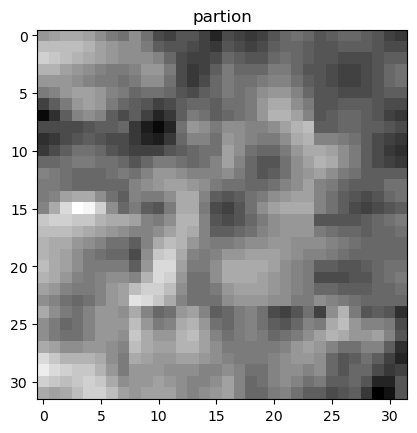

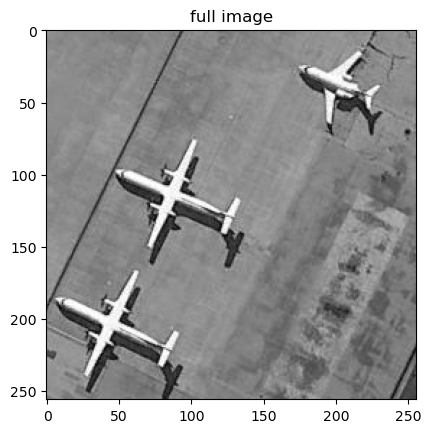

In [37]:
import matplotlib.pyplot as plt

plt.title('partion')
plt.imshow(tensor_img.squeeze(dim=0), cmap='gray')
plt.show()

plt.title('full image')
plt.imshow(pre_tensor_img.squeeze(dim=0), cmap='gray')
plt.show()